In [1]:
import numpy as np 
import pandas as pd

LOAD DATASET

In [2]:
df=pd.read_csv(r"C:\Users\Dilfina\Downloads\archive (10)\world_population.csv")

LEARN ABOUT DATASET

In [3]:
df.shape

(234, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [5]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [6]:
df.isna().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

SEGGREGATE DATA BY CONTINENT

In [7]:
# Asia
asian_countries = df.loc[df["Continent"]=="Asia"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

# Africa
african_countries = df.loc[df["Continent"]=="Africa"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

# Europe
european_countries = df.loc[df["Continent"]=="Europe"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

# North America
na_countries = df.loc[df["Continent"]=="North America"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

# Oceania
oc_countries = df.loc[df["Continent"]=="Oceania"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

# South America
sa_countries = df.loc[df["Continent"]=="South America"].sort_values(by=["2022 Population"], ascending=False, ignore_index=True)

GROUP BY CONTINENT AND DROP UNNECESSSARY

In [8]:
continent_df = df.groupby(by='Continent').sum()
altered_continent_df = continent_df.drop(columns=["CCA3", "Country/Territory", "Rank", "Capital", "Growth Rate", "Area (km²)", "Density (per km²)","World Population Percentage"])
altered_continent_df.head()

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population
Continent,,,,,,,,
Africa,1426730932,1360671810,1201102442,1055228072,818946032,638150629,481536377,365444348
Asia,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577,2635334228,2144906290
Europe,743147538,745792196,741535608,735613934,726093423,720320797,692527159,655923991
North America,600296136,594236593,570383850,542720651,486069584,421266425,368293361,315434606
Oceania,45038554,43933426,40403283,37102764,31222778,26743822,22920240,19480270


In [9]:
import matplotlib.pyplot as plt

PIE CHART FOR CONTINENTS

array([[<Axes: ylabel='2022 Population'>],
       [<Axes: ylabel='2020 Population'>],
       [<Axes: ylabel='2015 Population'>],
       [<Axes: ylabel='2010 Population'>],
       [<Axes: ylabel='2000 Population'>],
       [<Axes: ylabel='1990 Population'>],
       [<Axes: ylabel='1980 Population'>],
       [<Axes: ylabel='1970 Population'>]], dtype=object)

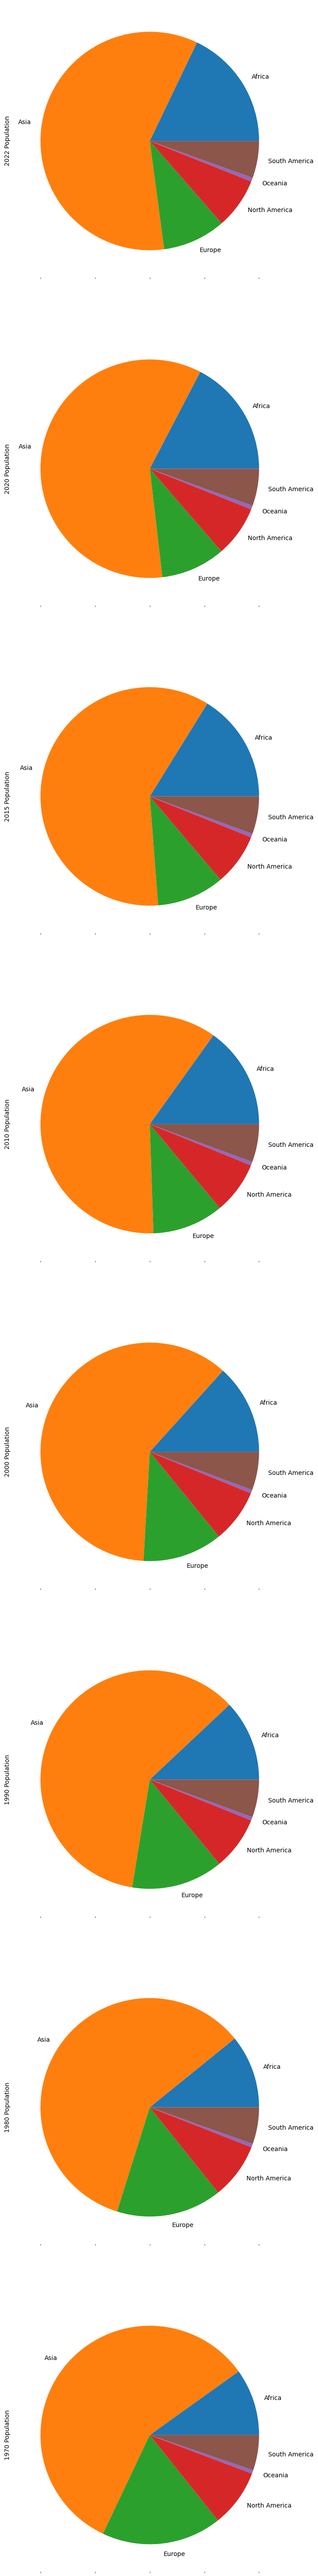

In [12]:
altered_continent_df.plot.pie(subplots=True, legend=False, figsize=(75,75), layout=(8, 1))


LINE CHART FOR CONTINENTS

<Axes: title={'center': 'Population over the years'}>

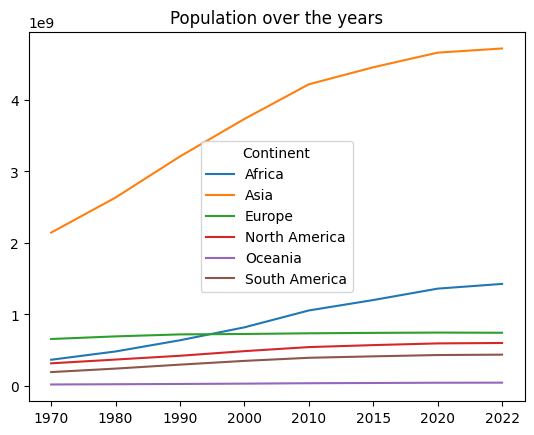

In [13]:
transposed = altered_continent_df.T
transposed.index = transposed.index.str.replace(" Population", "")
transposed.sort_index().plot.line(title="Population over the years", legend=True)

PIE FOR TOP 5 ASIA

<Axes: ylabel='2022 Population'>

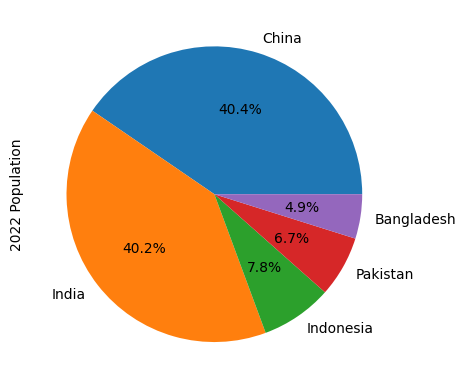

In [14]:
top_5_countries = asian_countries[["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)

top_5_countries.set_index("Country/Territory", inplace=True)

top_5_countries.plot.pie(y="2022 Population", autopct='%1.1f%%', legend=False)

PIE FOR TOP 5 EUROPE

<Axes: ylabel='2022 Population'>

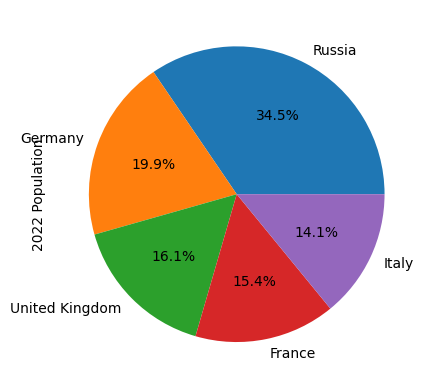

In [15]:
top_5_countries = european_countries[["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(5)

top_5_countries.set_index("Country/Territory", inplace=True)

top_5_countries.plot.pie(y="2022 Population", autopct='%1.1f%%', legend=False)

BAR CHART- TOP 10 

Text(0, 0.5, 'Population')

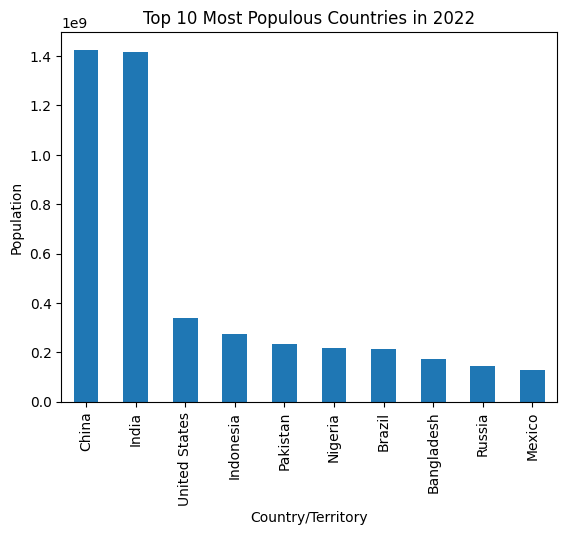

In [16]:
top_10_countries = df[["Country/Territory", "2022 Population"]].sort_values(by="2022 Population", ascending=False).head(10)
top_10_countries.set_index("Country/Territory", inplace=True)
top_10_countries.plot.bar(y="2022 Population", legend=False, title="Top 10 Most Populous Countries in 2022")
plt.ylabel('Population')

POPULATION DISTRIBUTION

Text(0.5, 0, 'Population')

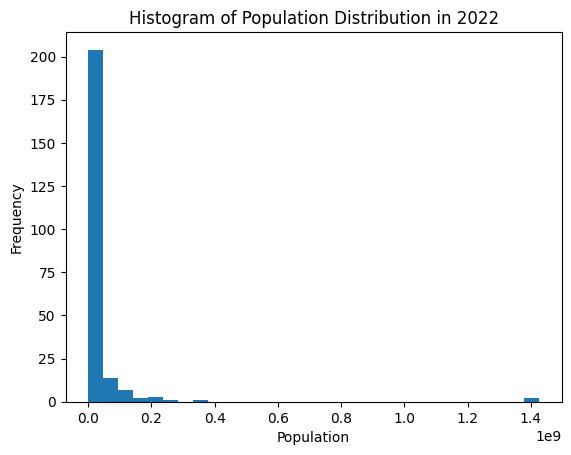

In [17]:
df["2022 Population"].plot.hist(bins=30, title="Histogram of Population Distribution in 2022")
plt.xlabel('Population')

Text(0, 0.5, 'Growth Rate (%)')

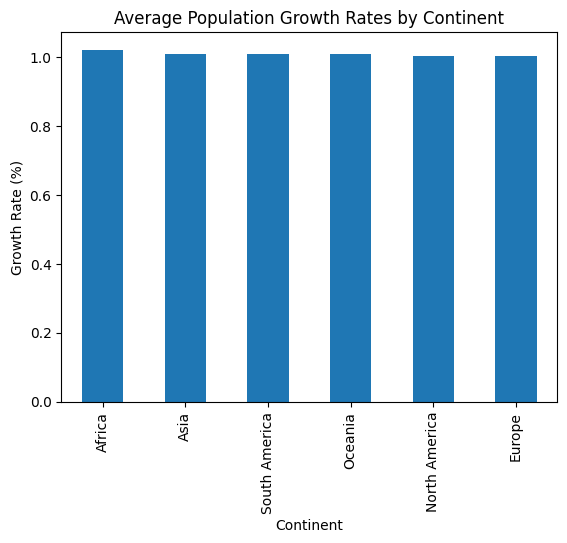

In [18]:
continent_growth_rate = df.groupby("Continent")["Growth Rate"].mean().sort_values(ascending=False)
continent_growth_rate.plot.bar(title="Average Population Growth Rates by Continent")
plt.ylabel('Growth Rate (%)')

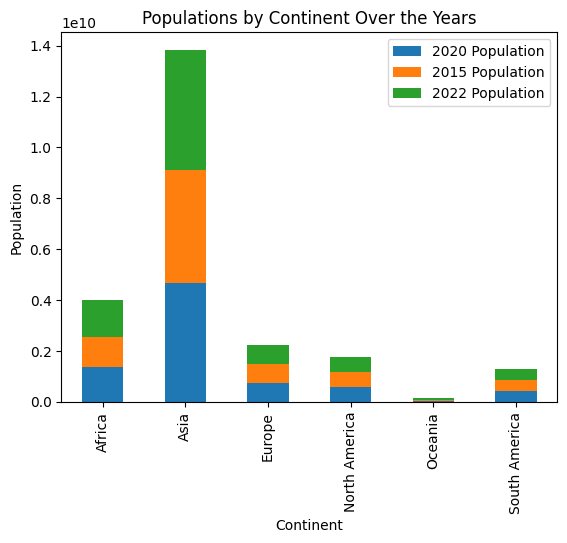

In [21]:
population_years = df.groupby("Continent")[["2020 Population", "2015 Population", "2022 Population"]].sum()
population_years.plot.bar(stacked=True, title="Populations by Continent Over the Years")
plt.ylabel('Population')
plt.show()